In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm
from matplotlib.patches import Patch



# Read the City and Ride Data
city_data_input = ("city_data.csv")
ride_data_input = ("ride_data.csv")

city_data = pd.read_csv(city_data_input)

ride_data= pd.read_csv(ride_data_input)
           

# Combine the data into a single dataset
pyber_data = ride_data.merge(city_data,how= 'left', on= 'city')
# Display the data table for preview

pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

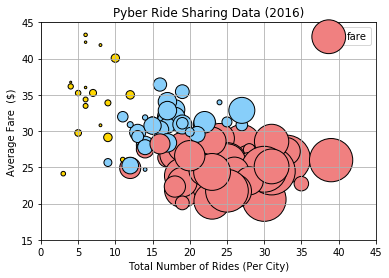

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
# Obtain the x and y coordinates for each of the three city types
pybercnt= pyber_data.groupby("city").count()#this is used for count ride_id per city

pybersum= pyber_data.groupby("city").sum() #this is used for the total number of drivers per city

pybermean= pyber_data.groupby("city").mean() #this is used for the average fare per ride / city


#define the 3 city types to colors
city_types = pyber_data['type'].unique()

types_to_colors = {"Rural":"gold","Suburban":"lightskyblue","Urban":"lightcoral" }
def types_to_colors_function(x):
    return types_to_colors[x]

t = pyber_data.groupby ("city").max() ['type'].apply(types_to_colors_function)
 

#x and y axis definition  # Build the scatter plots for each c types
scatter = plt.scatter(x=pybercnt["ride_id"] , y=pybermean["fare"] , s=pybersum["driver_count"], c=t,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare  ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend()

                
plt.grid()

plt.xlim(0,45)
plt.ylim(15,45)
plt.show()
plt.savefig("MathLab_PyberRide_bubbleplt.png")


# Create the figure
plt.show()
  
# Incorporate a text label regarding circle size
#plt.text(45, 35,"Note nCircle size correlates with driver count per city")
# Save Figure
plt.savefig("Pyber-Scatter-plot.png", bbox_inches='tight')

## Total Fares by City Type

63538.64
              fare
type              
Rural      4327.93
Suburban  19356.33
Urban     39854.38
           fare
type           
Rural      6.81
Suburban  30.46
Urban     62.72


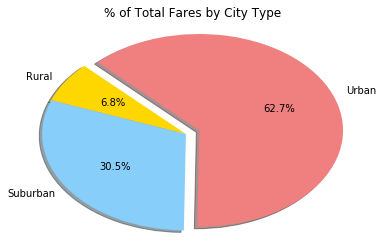

In [11]:
# Calculate Type Percents

sum_var = pyber_data["fare"].sum()
print(sum_var)

sum_fare = (pyber_data.groupby("type").agg({"fare":sum}))
print(pyber_data.groupby("type").agg({"fare":sum}))

  
percent = ((sum_fare / sum_var) *100).round(2)
print(percent)
colors = {"Rural":"gold","Subrban":"lightskyblue","Urban":"lightcoral"}


# Build Pie Chart
labels = ["Rural","Suburban", "Urban"]
sizes = [6.81,30.46,62.72]
colors= ["gold","lightskyblue","lightcoral"]
explode = (0, 0, .1)
plt.pie(percent, labels=labels, colors = colors,explode = explode, autopct="%1.1f%%", shadow=True, startangle=135)
        
plt.axis("auto")
plt.title("% of Total Fares by City Type")
plt.show
plt.savefig("TotalFaresbyCityType.png")

## Total Rides by City Type

2375
type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
           fare
type           
Rural      6.81
Suburban  30.46
Urban     62.72


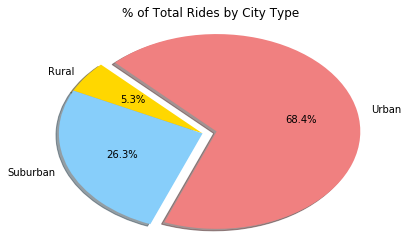

In [12]:
# Calculate Ride Percents
ride_id_var = pyber_data["ride_id"].count()
print(ride_id_var)

ride_id_type = (pyber_data.groupby("type"))
ride_id_type = ride_id_type["ride_id"].count()
print(ride_id_type)
percentt = ((ride_id_type / ride_id_var) *100).round(2)
print(percent)


# Build Pie Chart
plt.pie(percentt, labels=labels, colors = colors,explode = explode, autopct="%1.1f%%", shadow=True, startangle=135)
colors = {"Rural":"gold","Suburban":"lightskyblue","Urban":"light colral"}

labels = ["Rural", "Suburban","Urban" ]
sizes = [5.26,26.32,68.42]
colors= ["gold","lightskyblue", "lightcoral" ]
explode = (0, 0, .1)
     
plt.axis("auto")
plt.title("% of Total Rides by City Type")
#show figure
plt.show

# Save Figure
plt.savefig("TotalRidesbyCityType.png")

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents
driver_id_all = city_data.groupby("type").sum()
driver_id_all = city_data["driver_count"].sum()
print(driver_id_all)

driver_id_var = (city_data.groupby("type"))
driver_id_var = driver_id_var["driver_count"].sum()
print(driver_id_var)
percent = ((driver_id_var / driver_id_all) *100).round(2)
print(percent)

2973
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64
type
Rural        2.62
Suburban    16.48
Urban       80.89
Name: driver_count, dtype: float64


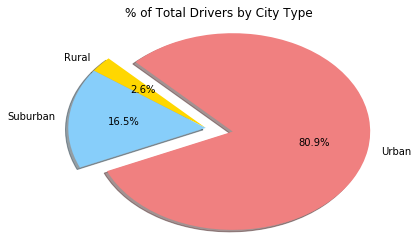

In [14]:
# Show Figure
labels = percent.index #["Rural","Suburban", "Urban"]
sizes = percent #[2.62,16.48,80.89]
colors= ["gold", "lightskyblue","lightcoral"]
explode = (0, 0,.2)
# Build Pie Charts
plt.pie(percent, labels=labels, colors = colors,explode = explode, autopct="%1.1f%%", shadow=True, startangle=135)
        
plt.axis("auto")
plt.title("% of Total Drivers by City Type")
plt.show

# Save Figure
plt.savefig("TotalDriversbyCityType.png")

# 

In [ ]:
#observations
#Average lower fares are associated with urban areas which also have a higher number of drivers - this competion drives down average fares
#The drivers by city type pie chart - shows urban ares attract more driver and / or the population of the city type supplies more drivers
#Trends show as total number of rides per city goes down the average fare goes down, regardless of city type